# Final Project: Determining glitch morphology classification
## DATS 6202 - Machine Learning I 
### Izzy Illari (G38518463) and Lucia Illari (G24308643)

<div align="left"> <font size="3"><i>Fig. 1:</i> The gravitational-wave event GW150914 observed by the LIGO Hanford (H1, left column panels) and Livingston (L1, right
column panels) detectors, with times shown relative to September 14, 2015 at 09:50:45 UTC. These are the time-frequency representation of the
strain data, demonstrating the "chirp" or frequency shift across time. (<a href="https://physics.aps.org/featured-article-pdf/10.1103/PhysRevLett.116.061102">image source</a>) </font></div>

<img style="display: block; margin-left: 50px; margin-right: 50px" src="gw150914_chirp.png" align="center" width="1000">



https://github.com/LuciaIllari/GSpy_glitch_classification

https://www.kaggle.com/tentotheminus9/gravity-spy-gravitational-waves

https://daily.zooniverse.org/2016/10/12/new-project-gravity-spy/

https://www.zooniverse.org/projects/zooniverse/gravity-spy/collections?page=227

https://arxiv.org/pdf/1611.04596.pdf

In [36]:
#importing necessary packages
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#for setting the seed
random_seed = 1234

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
#get current directory
dir = os.getcwd()

#get image data directories
train_dir = dir + '\\train\\train\\'
test_dir = dir + '\\test\\test\\'
validation_dir = dir + '\\validation\\validation\\'

In [17]:
#get image metadata
meta_original = pd.read_csv(dir+'\\trainingset_v1d1_metadata.csv')

In [24]:
#view columns
meta_original.columns

Index(['event_time', 'ifo', 'peak_time', 'peak_time_ns', 'start_time',
       'start_time_ns', 'duration', 'search', 'process_id', 'event_id',
       'peak_frequency', 'central_freq', 'bandwidth', 'channel', 'amplitude',
       'snr', 'confidence', 'chisq', 'chisq_dof', 'param_one_name',
       'param_one_value', 'gravityspy_id', 'label', 'sample_type', 'url1',
       'url2', 'url3', 'url4'],
      dtype='object')

In [74]:
#get the counts for the glitch classes
label_counts = pd.DataFrame(meta_original['label'].value_counts())
label_counts.reset_index(level=0, inplace=True)
label_counts = label_counts.rename(columns={"index": "class", "label": "counts"})
label_counts['percent'] = label_counts['counts']/label_counts['counts'].sum()*100

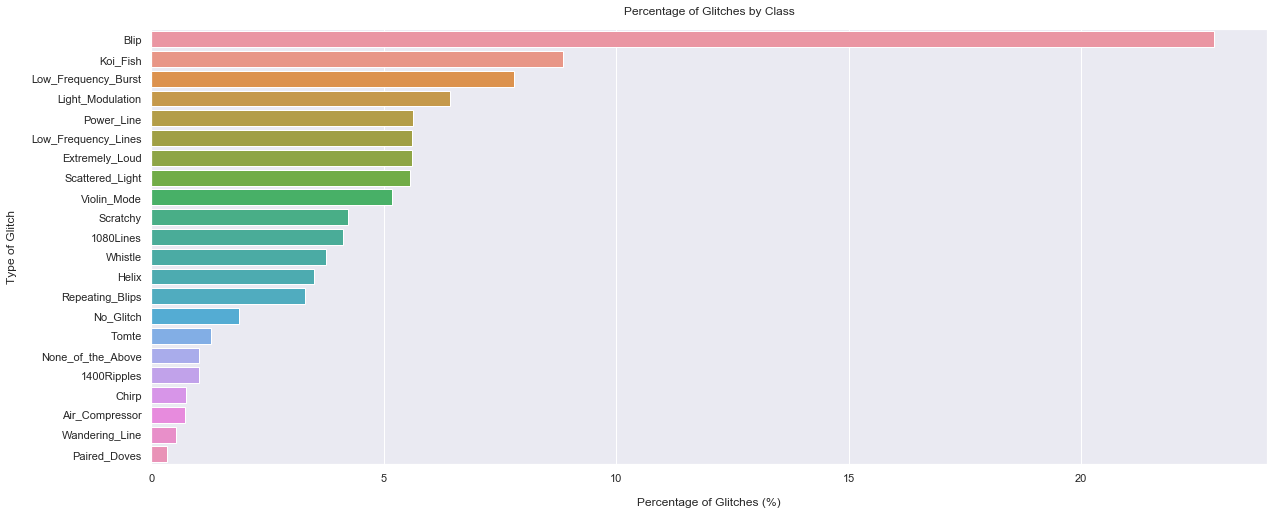

In [76]:
#setting plot size
sns.set(rc={'figure.figsize':(20,8)})

#let's look at how many glitch classes and how many of each kind there are
b1 = sns.barplot(x="percent", y="class", data=label_counts, orient = "h");
b1.set_ylabel("Type of Glitch", labelpad=14);
b1.set_xlabel("Percentage of Glitches (%)", labelpad=14)
b1.set_title("Percentage of Glitches by Class", y=1.02);

In [22]:
#most of the columns are unnecessary for our purposes, so we will drop them
meta = meta_original[['duration','peak_frequency','central_freq','bandwidth','amplitude','snr','param_one_value','label','sample_type']]

#subset metadata into train, test, and validation datasets
meta_train = meta[meta["sample_type"] == 'train']
meta_train.drop('sample_type', axis=1, inplace=True)

meta_test = meta[meta["sample_type"] == 'test']
meta_test.drop('sample_type', axis=1, inplace=True)

meta_val = meta[meta["sample_type"] == 'validation']
meta_val.drop('sample_type', axis=1, inplace=True)

In [23]:
#quick look at data
meta_val

,duration,peak_frequency,central_freq,bandwidth,amplitude,snr,param_one_value,label
3,0.82422,1182.974609,3981.774658,7492.717773,1.462120e-22,10.321160,0.76242,Whistle
4,2.00366,1456.511353,3979.026855,7942.912109,4.038300e-22,14.380160,-0.31161,Whistle
6,0.70312,823.183594,2520.089111,4840.522949,9.513880e-23,9.273810,0.50844,Whistle
11,0.09375,326.978760,325.483459,23.179831,5.591810e-22,7.765430,-0.26669,Whistle
13,0.30078,1834.615723,3610.706787,6973.997559,1.835290e-22,8.530150,-1.12437,Whistle
...,...,...,...,...,...,...,...,...
7931,0.51758,123.754059,138.069626,130.556854,6.967370e-23,8.591070,2.52188,Scratchy
7938,0.44531,1085.830078,4298.645996,6898.204590,2.366700e-22,8.427400,-0.59947,1080Lines
7946,0.04688,134.965424,206.664536,178.921906,5.645310e-22,9.388550,2.19965,Helix
7955,0.81250,121.663269,444.386383,824.772766,9.080070e-22,82.451103,0.06565,Koi_Fish
